Found 9 images belonging to 3 classes.
Found 2 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                            

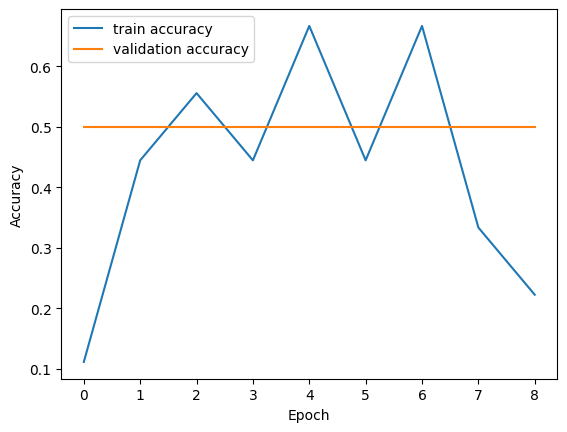

1/1 [==============================] - 0s 120ms/step
              precision    recall  f1-score   support

       Green       0.00      0.00      0.00         1
         Red       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\anaconda\envs\Carla\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\Carla\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\Carla\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


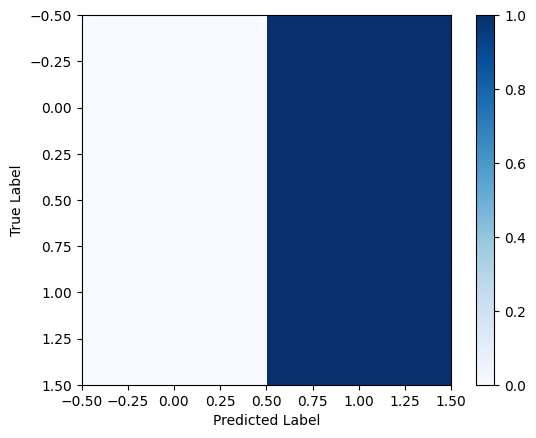

D:\anaconda\envs\Carla\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Data parameters
data_dir = 'D:/Capstone/dataset/photos/train_dataset/train_images'
img_size = (64, 64)
batch_size = 32

# Data paths
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                             zoom_range=0.1, horizontal_flip=True)

train_data = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size,
                                         class_mode='categorical', subset='training')

val_data = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size,
                                       class_mode='categorical', subset='validation')


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

#making model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Training model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[early_stopping])
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#report and confusion matrix
val_data.reset()
preds = model.predict(val_data)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_data.classes


unique_classes = np.unique(true_labels)
target_names = [list(val_data.class_indices.keys())[i] for i in unique_classes]
print(classification_report(true_labels, pred_labels, labels=unique_classes, target_names=target_names))


conf_matrix = confusion_matrix(true_labels, pred_labels, labels=unique_classes)
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


model.save('traffic_light_classifier.h5')
